# Big Data Analytics CW2

## Author        : Sanjith Chandrasekaran

## Student id    : 33788702


<H3> Component 1: Project Proposal </H3>

This project proposal aims to construct a predictive model to accurately determine whether an online visitor will make a purchase or not, utilizing the Online Shoppers Purchasing Intention Dataset from the UCI Machine Learning Repository. Employing PySpark, a distributed data processing and machine learning framework, we will utilize its DataFrame API for efficient data manipulation and MLlib library for building and training machine learning models. Leveraging various classification algorithms available in PySpark MLlib, including Logistic Regression, Decision Trees, Random Forest, and Multilayer Perceptron, we seek to develop predictive models. Evaluation of model performance will be conducted using PySpark ML evaluators such as MulticlassClassificationEvaluator and BinaryClassificationEvaluator, focusing on metrics like accuracy, F1 score, and area under the ROC curve. Addressing challenges such as class imbalance in the dataset will be crucial to ensure the model's efficacy in real-world scenarios.

### Dataset

Link to the Dataset: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

Overview if the Dataset: The Online Shoppers Purchasing Intention Dataset contains feature vectors from 12,330 sessions, donated on August 30, 2018. It is primarily used for classification and clustering tasks in the business domain. The dataset consists of both positive and negative class samples, with 84.5% (10,422) representing sessions that did not end with a purchase, and the remaining 15.5% (1,908) representing sessions that ended with a purchase. The dataset is multivariate, with 17 features of 10 numerical and 8 categorical.


HDFS path to the dataset - "hdfs://dsm-master:9000/user/schan007/online_shoppers_intention.csv"


* Administrative: Represents the number of administrative pages visited by the user.
* Administrative_Duration: Indicates the total time spent by the user on administrative pages.
* Informational: Denotes the number of informational pages visited by the user.
* Informational_Duration: Represents the total time spent by the user on informational pages.
* ProductRelated: Indicates the number of product-related pages visited by the user.
* ProductRelated_Duration: Represents the total time spent by the user on product-related pages.
* BounceRates: Reflects the bounce rate for the website, i.e., the percentage of visitors who leave the site after viewing only one page.
* ExitRates: Indicates the exit rate for the website, i.e., the percentage of visitors who leave the site from a particular page.
* PageValues: Represents the average value of a page that a user visited before completing an e-commerce transaction.
* SpecialDay: Indicates the closeness of the site visiting time to a specific special day, such as holidays or promotions.
* Month: Represents the month of the year when the session occurred.
* OperatingSystems: Denotes the operating system used by the visitor.
* Browser: Represents the browser used by the visitor.
* Region: Indicates the geographical region of the visitor.
* TrafficType: Represents the type of traffic through which the visitor arrived at the website.
* VisitorType: Indicates whether the visitor is a (Returning visitor) or a (New visitor).
* Weekend: A binary feature indicating whether the visit occurred on a weekend (TRUE) or not (FALSE).
* Revenue: The target variable, indicating whether the visitor made a purchase (TRUE) or not (FALSE).

## Component 2: Project implementation

## 1. Project Setup and Data Loading

we establish a SparkSession named 'online shopping' to facilitate our data processing tasks. We then specify the HDFS path to the CSV file containing our dataset, which is the Online Shoppers Intention Dataset. Finally, using the spark.read.csv function, we read the CSV file into a DataFrame named 'online', enabling us to analyze and manipulate the data using PySpark.

In [290]:
from pyspark.sql import SparkSession

# Create a new SparkSession
spark = SparkSession.builder.appName('online shopping').getOrCreate()

# Specify the HDFS path to the CSV file
hdfs_path = "hdfs://dsm-master:9000/user/schan007/online_shoppers_intention.csv"

# Read the CSV file into a DataFrame
online = spark.read.csv(hdfs_path, header=True, inferSchema=True)

we define a list of columns representing our features (X) and another column for our target variable (y)

In [291]:
from pyspark.sql import functions as F

# Assuming 'online' is your DataFrame containing the dataset
X_columns = ['Administrative', 'Administrative_Duration', 'Informational', 
             'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
             'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 
             'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 
             'Weekend']

# Selecting features (X) columns
X = online.select(X_columns)

# Selecting target variable (y) column
y = online.select('Revenue')

# Show sample data for features (X)
X.show(5)

# Show sample data for target variable (y)
y.show(5)


+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+---------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+
|Administrative|Administrative_Duration|Informational|Informational_Duration|ProductRelated|ProductRelated_Duration|BounceRates|ExitRates|PageValues|SpecialDay|Month|OperatingSystems|Browser|Region|TrafficType|      VisitorType|Weekend|
+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+---------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+
|             0|                    0.0|            0|                   0.0|             1|                    0.0|        0.2|      0.2|       0.0|       0.0|  Feb|               1|      1|     1|          1|Returning_Visitor|  false|
|             0|                    0.0|            

We are checking the shape of X and y,

In [263]:
# Assuming you have already defined X and y DataFrames
# Get the number of rows in X (features DataFrame)
num_rows_X = X.count()

# Get the number of columns in X (features DataFrame)
num_columns_X = len(X.columns)

# Print the shape of X
print("Shape of X (features): ({}, {})".format(num_rows_X, num_columns_X))

# Get the number of rows in y (target variable DataFrame)
num_rows_y = y.count()

# Get the number of columns in y (target variable DataFrame)
num_columns_y = len(y.columns)

# Print the shape of y
print("Shape of y (target): ({}, {})".format(num_rows_y, num_columns_y))



Shape of X (features): (12330, 17)
Shape of y (target): (12330, 1)


Displaying each column name and its corresponding data type

In [264]:
# Assuming you have already defined X (features DataFrame) and y (target variable DataFrame)
# Print schema of X (features DataFrame)
print("Schema of X (features):")
X.printSchema()

# Print schema of y (target variable DataFrame)
print("Schema of y (target):")
y.printSchema()


Schema of X (features):
root
 |-- Administrative: integer (nullable = true)
 |-- Administrative_Duration: double (nullable = true)
 |-- Informational: integer (nullable = true)
 |-- Informational_Duration: double (nullable = true)
 |-- ProductRelated: integer (nullable = true)
 |-- ProductRelated_Duration: double (nullable = true)
 |-- BounceRates: double (nullable = true)
 |-- ExitRates: double (nullable = true)
 |-- PageValues: double (nullable = true)
 |-- SpecialDay: double (nullable = true)
 |-- Month: string (nullable = true)
 |-- OperatingSystems: integer (nullable = true)
 |-- Browser: integer (nullable = true)
 |-- Region: integer (nullable = true)
 |-- TrafficType: integer (nullable = true)
 |-- VisitorType: string (nullable = true)
 |-- Weekend: boolean (nullable = true)

Schema of y (target):
root
 |-- Revenue: boolean (nullable = true)



Things to be fixed in Data cleaning:
    
* Checking for missing values
* Weekend (Boolean) - Needs to be converted to string first
* Revenue (Boolean) - Needs to be converted to string first
* Next, Revenue - convert to integer
* Month - Convert it to Categorical 
* VisitorType - Convert it to Categorical
* Weekend - Convert it to Categorical

## 2. Data Cleaning

### 2.1 Checking for missing values

In [287]:
from pyspark.sql.functions import col

# Create a dictionary to store column names and their respective missing value counts
missing_counts_X = {}

# Loop through each column in X and calculate the count of missing values
for c in X.columns:
    missing_counts_X[c] = X.filter(col(c).isNull()).count()

# Print the count of missing values for each column in X
print("Missing values in X:")
for column, count in missing_counts_X.items():
    print(f"{column}: {count}")


Missing values in X:
Administrative: 0
Administrative_Duration: 0
Informational: 0
Informational_Duration: 0
ProductRelated: 0
ProductRelated_Duration: 0
BounceRates: 0
ExitRates: 0
PageValues: 0
SpecialDay: 0
Month: 0
OperatingSystems: 0
Browser: 0
Region: 0
TrafficType: 0
VisitorType: 0
Weekend: 0


In [266]:
from pyspark.sql.functions import col

# Create a dictionary to store column names and their respective missing value counts
missing_counts_y = {}

# Loop through each column in y and calculate the count of missing values
for c in y.columns:
    missing_counts_y[c] = y.filter(col(c).isNull()).count()

# Print the count of missing values for each column in y
print("Missing values in y:")
for column, count in missing_counts_y.items():
    print(f"{column}: {count}")


Missing values in y:
Revenue: 0


There are no missing values in the dataset.


Here is the revised list of tasks for the data cleaning phase:

* Convert 'Weekend' (Boolean) to string first.
* Convert 'Revenue' (Boolean) to string first.
* Then, convert 'Revenue' to integer.
* Convert 'Month' to Categorical.
* Convert 'VisitorType' to Categorical.
* Convert 'Weekend' to Categorical.

In [272]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator
from pyspark.sql.functions import when
from pyspark.sql.types import IntegerType

# Convert boolean columns to string
online = online.withColumn("Weekend", col("Weekend").cast("string"))
online = online.withColumn("Revenue", col("Revenue").cast("string"))

# Initialize StringIndexer
string_indexer = StringIndexer(inputCol="Revenue", outputCol="Revenue_int")

# Fit and transform the data
online = string_indexer.fit(online).transform(online)

# Define categorical columns to be converted
categorical_cols = ['Month', 'VisitorType', 'Weekend',]

# Define indexers to perform string indexing
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="skip") for col in categorical_cols]

# Define encoders to perform one-hot encoding
encoders = [OneHotEncoderEstimator(inputCols=[col+"_index"], outputCols=[col+"_encoded"]) for col in categorical_cols]

# Define pipeline
pipeline = Pipeline(stages=indexers + encoders)

# Fit and transform the data
model = pipeline.fit(online)
online_data = model.transform(online)

In [285]:
online_data

DataFrame[Administrative: int, Administrative_Duration: double, Informational: int, Informational_Duration: double, ProductRelated: int, ProductRelated_Duration: double, BounceRates: double, ExitRates: double, PageValues: double, SpecialDay: double, OperatingSystems: int, Browser: int, Region: int, TrafficType: int, Revenue_int: double, Month_encoded: vector, VisitorType_encoded: vector, Weekend_encoded: vector]

Dropping the columns because the newly created columns using one-hot encoding are now available

In [274]:
columns_to_drop = ["Month", "Month_index", "Weekend", "Weekend_index",
                   "Revenue", "VisitorType", "VisitorType_index"]
online_data = online_data.drop(*columns_to_drop)

# Show the schema of the cleaned DataFrame
online_data.printSchema()

root
 |-- Administrative: integer (nullable = true)
 |-- Administrative_Duration: double (nullable = true)
 |-- Informational: integer (nullable = true)
 |-- Informational_Duration: double (nullable = true)
 |-- ProductRelated: integer (nullable = true)
 |-- ProductRelated_Duration: double (nullable = true)
 |-- BounceRates: double (nullable = true)
 |-- ExitRates: double (nullable = true)
 |-- PageValues: double (nullable = true)
 |-- SpecialDay: double (nullable = true)
 |-- OperatingSystems: integer (nullable = true)
 |-- Browser: integer (nullable = true)
 |-- Region: integer (nullable = true)
 |-- TrafficType: integer (nullable = true)
 |-- Revenue_int: double (nullable = false)
 |-- Month_encoded: vector (nullable = true)
 |-- VisitorType_encoded: vector (nullable = true)
 |-- Weekend_encoded: vector (nullable = true)



## 3. Exploratory Data Analysis

### 3.1 Revenue Distribution: Proportions of Purchase and Non-Purchase Sessions

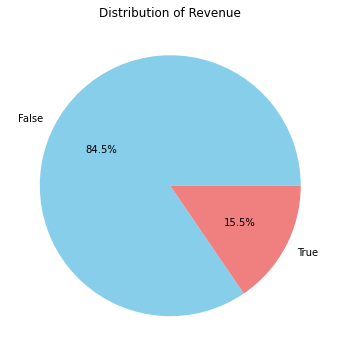

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Revenue and count occurrences
revenue_counts = online.groupBy('Revenue').count().orderBy('Revenue')

# Convert Spark DataFrame to Pandas DataFrame for visualization
revenue_counts_pandas = revenue_counts.toPandas()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(revenue_counts_pandas['count'], labels=revenue_counts_pandas['Revenue'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Revenue')
plt.show()


The pie chart clearly depicts that the proportion of visitors who didn't make a purchase is higher.

### 3.2 Monthly Occurrence Analysis: Distribution of Sessions Across Months



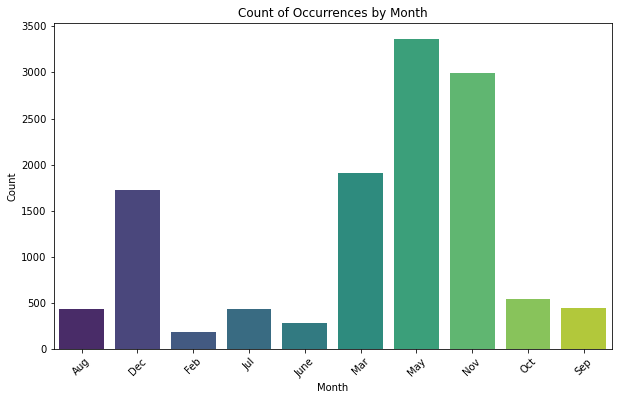

In [268]:
# Group by Month and count occurrences
month_counts = online.groupBy('Month').count().orderBy('Month')

# Convert Spark DataFrame to Pandas DataFrame for visualization
month_counts_pandas = month_counts.toPandas()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='count', data=month_counts_pandas, palette='viridis')
plt.title('Count of Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The bar chart shows that May has the highest number of visitors.

### 3.3 Multivariate Bar Chart: VisitorType Distribution Across Months

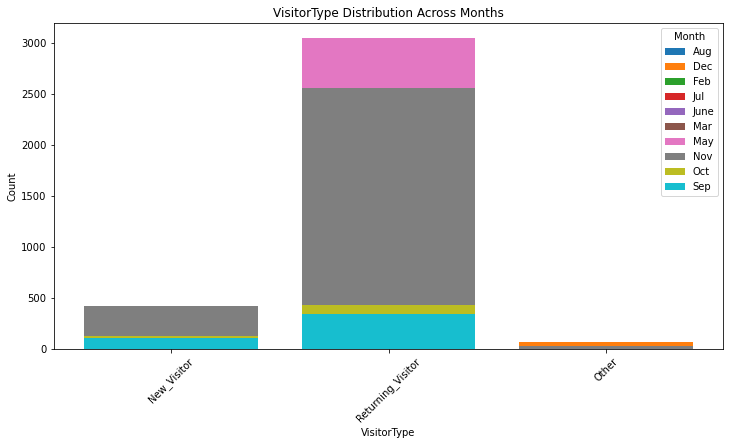

In [269]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Assuming 'online' is your DataFrame containing the dataset

# Grouping by Month and VisitorType and counting the occurrences
month_visitor_counts = online.groupBy('Month', 'VisitorType').count().orderBy('Month', 'VisitorType')

# Converting Spark DataFrame to Pandas DataFrame for visualization
month_visitor_counts_pandas = month_visitor_counts.toPandas()

# Plotting bar chart for Month and VisitorType
plt.figure(figsize=(12, 6))
for month, data in month_visitor_counts_pandas.groupby('Month'):
    plt.bar(data['VisitorType'], data['count'], label=month)

plt.xlabel('VisitorType')
plt.ylabel('Count')
plt.title('VisitorType Distribution Across Months')
plt.legend(title='Month')
plt.xticks(rotation=45)
plt.show()


The chart clearly indicates that the count of returning visitors exceeds that of new visitors, with particularly notable numbers for returning visitors in November, reaching 2000.

### 3.4 Exploring the Interaction between Visitor Types and Weekends

<Figure size 1440x720 with 0 Axes>

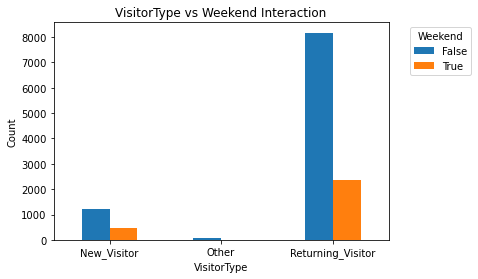

In [270]:
import matplotlib.pyplot as plt

# Group by VisitorType and Weekend and count occurrences
visitor_weekend_counts = online.groupBy('VisitorType', 'Weekend').count().orderBy('VisitorType', 'Weekend')

# Convert Spark DataFrame to Pandas DataFrame for visualization
visitor_weekend_counts_pandas = visitor_weekend_counts.toPandas()

# Plot grouped bar chart with larger figure size
plt.figure(figsize=(20, 10))  # Adjust the figsize as needed
visitor_weekend_counts_pandas.pivot("VisitorType", "Weekend", "count").plot(kind="bar", stacked=False)
plt.title('VisitorType vs Weekend Interaction')
plt.xlabel('VisitorType')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Weekend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The chart illustrates that 8000 visitors return on weekdays, while only 2000 visitors return on weekends. Additionally, there are approximately 1000 new visitors on weekdays and 500 new visitors on weekends. This suggests that the majority of visitors tend to visit on weekdays.

### 3.5 Heatmap for Revenue Distribution Across Months

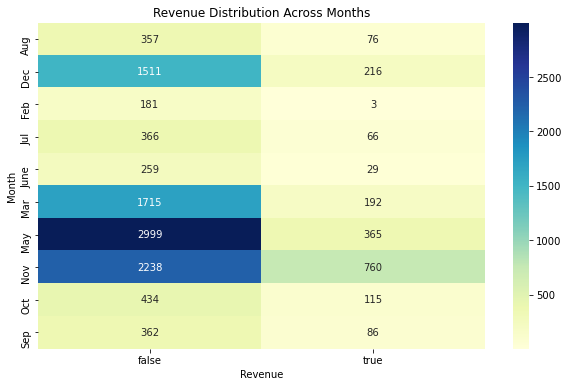

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to have Month as rows, Revenue as columns, and count as values
heatmap_data = month_revenue_counts_pandas.pivot("Month", "Revenue", "count").fillna(0)

# Plot heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Revenue Distribution Across Months')
plt.xlabel('Revenue')
plt.ylabel('Month')
plt.show()




Heatmap illustrates that the highest revenue was generated in the month of November.

## 4. ML Modelling:

### So, the first step is splitting the dataset into train (70%) and test (30%).

In [275]:
# Specify the ratio for splitting the data
train_ratio = 0.7
test_ratio = 1 - train_ratio

# Split the dataset into training and testing sets
train_online, test_online = online_data.randomSplit([train_ratio, test_ratio], seed=123)

# Show the number of rows in each set
print("Number of rows in training set:", train_online.count())
print("Number of rows in testing set:", test_online.count())


Number of rows in training set: 8582
Number of rows in testing set: 3748


### Now, we are utilizing the Vector Assembler, which transforms the data into a format where all the features are combined into a single vector, while keeping the target variable separate.

In [276]:
from pyspark.ml.feature import VectorAssembler

# Define the columns to assemble
feature_columns = ['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                   'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
                   'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
                   'Month_encoded', 'VisitorType_encoded', 'Weekend_encoded']

# Define VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Assemble the features
X_train_transformed = assembler.transform(train_online)

# Show sample of assembled features
X_train_transformed.select("features","Revenue_int").show(5, truncate=False)

+------------------------------------------------------------------------------+-----------+
|features                                                                      |Revenue_int|
+------------------------------------------------------------------------------+-----------+
|(26,[6,7,10,11,12,13,22,23,25],[0.18,0.181818182,2.0,2.0,7.0,6.0,1.0,1.0,1.0])|0.0        |
|(26,[6,7,10,11,12,13,14,23,25],[0.2,0.2,2.0,2.0,8.0,3.0,1.0,1.0,1.0])         |0.0        |
|(26,[6,7,10,11,12,13,14,23],[0.2,0.2,3.0,2.0,3.0,18.0,1.0,1.0])               |0.0        |
|(26,[4,7,10,11,12,13,16,23,25],[1.0,0.1,2.0,2.0,2.0,6.0,1.0,1.0,1.0])         |0.0        |
|(26,[4,7,10,11,12,13,14,23],[1.0,0.1,2.0,2.0,3.0,18.0,1.0,1.0])               |0.0        |
+------------------------------------------------------------------------------+-----------+
only showing top 5 rows



### Applying the Vector Assembler on test set:

In [277]:
X_test_transformed = assembler.transform(test_online)

X_test_transformed.select("features","Revenue_int").show(5, truncate=False)


+---------------------------------------------------------------------+-----------+
|features                                                             |Revenue_int|
+---------------------------------------------------------------------+-----------+
|(26,[6,7,10,11,12,13,15,23,25],[0.2,0.2,1.0,1.0,8.0,8.0,1.0,1.0,1.0])|0.0        |
|(26,[6,7,10,11,12,13,15,23,25],[0.2,0.2,1.0,1.0,9.0,2.0,1.0,1.0,1.0])|0.0        |
|(26,[6,7,10,11,12,13,15,23,25],[0.2,0.2,1.0,1.0,9.0,3.0,1.0,1.0,1.0])|0.0        |
|(26,[4,7,10,11,12,13,15,23,25],[1.0,0.1,2.0,6.0,1.0,3.0,1.0,1.0,1.0])|0.0        |
|(26,[4,7,10,11,12,13,21,23,25],[1.0,0.2,1.0,1.0,4.0,4.0,1.0,1.0,1.0])|0.0        |
+---------------------------------------------------------------------+-----------+
only showing top 5 rows



## Classification Models

### 4.1 Random Forest Model:

We performed a grid search with a Random Forest classifier using varying numbers of trees (10, 20, 30) and depths (5, 10, 15) to optimize revenue prediction. Additionally, we employed 3-fold cross-validation to train and assess the model's performance.

Random Forest Model
Accuracy: 0.9023479188900747
F1 Score: 0.7762014861541752
Precision: 0.8970290904399598


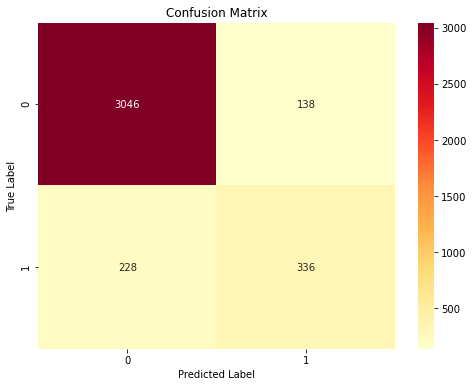

In [293]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns


# Define Random Forest classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="Revenue_int")

# Define parameter grid for grid search
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 30]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .build()

# Define evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="accuracy")

# Define cross-validator
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)  # Use 3 folds for cross-validation

# Train model
cvModel = crossval.fit(X_train_transformed)

# Make predictions on test set
predictions = cvModel.transform(X_test_transformed)

print("Random Forest Model")


# Calculate accuracy
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Define BinaryClassificationEvaluator for F1 score
evaluator_f1 = BinaryClassificationEvaluator(labelCol="Revenue_int", rawPredictionCol="prediction", metricName="areaUnderROC")

# Calculate F1 score
f1_score = evaluator_f1.evaluate(predictions)
print("F1 Score:", f1_score)

# Define MulticlassClassificationEvaluator for classification report
evaluator_report = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="weightedPrecision")

# Calculate precision
precision = evaluator_report.evaluate(predictions)
print("Precision:", precision)

# Cast Revenue_int to DoubleType
predictions = predictions.withColumn("Revenue_int", col("Revenue_int").cast("double"))

# Calculate confusion matrix
predictionAndLabels = predictions.select("prediction", "Revenue_int").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Convert the confusion matrix to a numpy array
conf_matrix = metrics.confusionMatrix().toArray()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlOrRd", fmt="g")

# Set labels, title, and display the heatmap
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


The F1 score of 0.776 indicates a moderately good balance between precision and recall for the Random Forest model.

### 4.2 Decision Tree Model:

We are performing Decision Tree classification using PySpark ML, evaluated its performance metrics including accuracy, F1 score, and precision, and visualized the confusion matrix using Matplotlib and Seaborn.

Decision Tree Model
Accuracy: 0.9020811099252934
F1 Score: 0.7804213888591897
Precision: 0.897362826118794


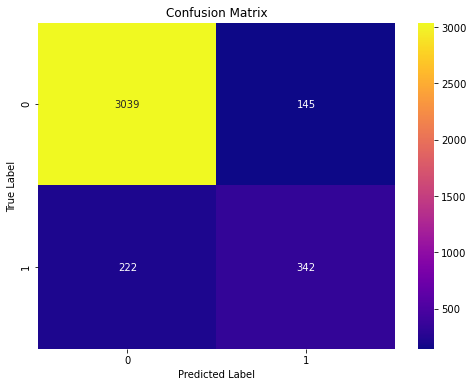

In [279]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Define Decision Tree classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="Revenue_int")

# Train the model
model = dt.fit(X_train_transformed)

# Make predictions on the test set
predictions = model.transform(X_test_transformed)

# Define MulticlassClassificationEvaluator for accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="accuracy")

print("Decision Tree Model")


# Calculate accuracy
accuracy = evaluator_accuracy.evaluate(predictions)
print("Accuracy:", accuracy)

# Define BinaryClassificationEvaluator for F1 score
evaluator_f1 = BinaryClassificationEvaluator(labelCol="Revenue_int", rawPredictionCol="prediction", metricName="areaUnderROC")

# Calculate F1 score
f1_score = evaluator_f1.evaluate(predictions)
print("F1 Score:", f1_score)

# Define MulticlassClassificationEvaluator for classification report
evaluator_report = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="weightedPrecision")

# Calculate precision
precision = evaluator_report.evaluate(predictions)
print("Precision:", precision)

# Cast Revenue_int to DoubleType
predictions = predictions.withColumn("Revenue_int", col("Revenue_int").cast("double"))

# Calculate confusion matrix
predictionAndLabels = predictions.select("prediction", "Revenue_int").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Convert the confusion matrix to a numpy array
conf_matrix = metrics.confusionMatrix().toArray()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="plasma", fmt="g")

# Set labels, title, and display the heatmap
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


The Decision Tree model achieved an F1 score of 0.780, This F1 score is slightly higher than that of the Random Forest model, suggesting that the Decision Tree model may be performing slightly better overall.

### 4.3 Naive Bayes Model:

Naive Bayes Model
Accuracy: 0.8676627534685165
F1 Score: 0.8705436685550024
Precision: 0.8740939868240034


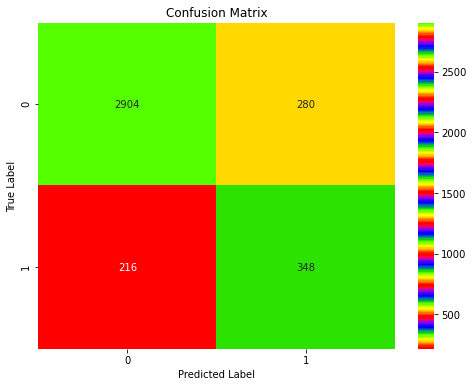

In [280]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Define Naive Bayes classifier
nb = NaiveBayes(featuresCol="features", labelCol="Revenue_int")

# Train the model
model = nb.fit(X_train_transformed)

# Make predictions on the test set
predictions = model.transform(X_test_transformed)

# Define MulticlassClassificationEvaluator for accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="accuracy")

print("Naive Bayes Model")


# Calculate accuracy
accuracy = evaluator_accuracy.evaluate(predictions)
print("Accuracy:", accuracy)

# Define MulticlassClassificationEvaluator for F1 score
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="f1")

# Calculate F1 score
f1_score = evaluator_f1.evaluate(predictions)
print("F1 Score:", f1_score)

# Define MulticlassClassificationEvaluator for precision
evaluator_precision = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="weightedPrecision")

# Calculate precision
precision = evaluator_precision.evaluate(predictions)
print("Precision:", precision)

# Cast Revenue_int to DoubleType
predictions = predictions.withColumn("Revenue_int", col("Revenue_int").cast("double"))

# Calculate confusion matrix
predictionAndLabels = predictions.select("prediction", "Revenue_int").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Convert the confusion matrix to a numpy array
conf_matrix = metrics.confusionMatrix().toArray()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="prism", fmt="g")

# Set labels, title, and display the heatmap
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


The Naive Bayes model achieved an impressive F1 score of 0.871, which is notably higher than the F1 scores of both the Random Forest and Decision Tree models. Naive Bayes classifiers are known for their simplicity and efficiency in handling large datasets with high-dimensional feature spaces

### 4.4 Support Vector Machines:

We're training the Linear Support Vector Machines (SVM) classifier on the training data and evaluating its performance on the test set to assess its accuracy, F1 score, and precision.

Support Vector Machines
Accuracy: 0.887940234791889
F1 Score: 0.8725874635412649
Precision: 0.8767585861485138


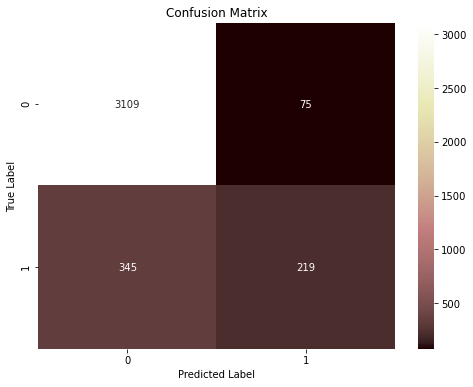

In [292]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns

# Define Linear SVM classifier
svm = LinearSVC(featuresCol="features", labelCol="Revenue_int", maxIter=10)

# Train the model
model = svm.fit(X_train_transformed)

# Make predictions on the test set
predictions = model.transform(X_test_transformed)

# Define MulticlassClassificationEvaluator for accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="accuracy")

print("Support Vector Machines")


# Calculate accuracy
accuracy = evaluator_accuracy.evaluate(predictions)
print("Accuracy:", accuracy)

# Define BinaryClassificationEvaluator for F1 score
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="f1")

# Calculate F1 score
f1_score = evaluator_f1.evaluate(predictions)
print("F1 Score:", f1_score)

# Define MulticlassClassificationEvaluator for classification report
evaluator_report = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="weightedPrecision")

# Calculate precision
precision = evaluator_report.evaluate(predictions)
print("Precision:", precision)

# Cast Revenue_int to DoubleType
predictions = predictions.withColumn("Revenue_int", col("Revenue_int").cast("double"))

# Calculate confusion matrix
predictionAndLabels = predictions.select("prediction", "Revenue_int").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Convert the confusion matrix to a numpy array
conf_matrix = metrics.confusionMatrix().toArray()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="pink", fmt="g")

# Set labels, title, and display the heatmap
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


SVM achieves a high F1 Score, which suggests that it performs well in predicting the target variable (revenue) from the test set compared to the other models discussed earlier.

### 4.5 Linear Regression:

We are utilizing Logistic Regression, a popular algorithm for binary classification, to model the relationship between the independent variables and the binary outcome.

Logistic Regression
Accuracy: 0.8874066168623266
F1 Score: 0.873354694245517
Precision: 0.87568359194872


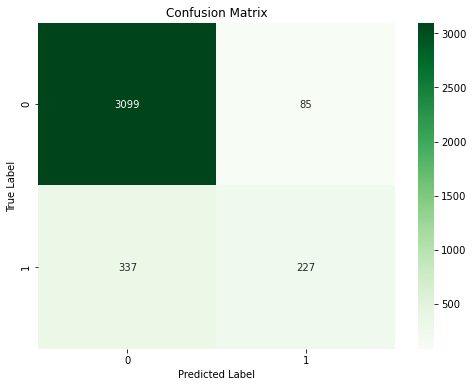

In [282]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns

# Define Logistic Regression classifier
lr = LogisticRegression(featuresCol="features", labelCol="Revenue_int", maxIter=10)

# Train the model
model = lr.fit(X_train_transformed)

# Make predictions on the test set
predictions = model.transform(X_test_transformed)

# Define MulticlassClassificationEvaluator for accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="accuracy")

print("Logistic Regression")

# Calculate accuracy
accuracy = evaluator_accuracy.evaluate(predictions)
print("Accuracy:", accuracy)

# Define BinaryClassificationEvaluator for F1 score
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="f1")

# Calculate F1 score
f1_score = evaluator_f1.evaluate(predictions)
print("F1 Score:", f1_score)

# Define MulticlassClassificationEvaluator for classification report
evaluator_report = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="weightedPrecision")

# Calculate precision
precision = evaluator_report.evaluate(predictions)
print("Precision:", precision)

# Cast Revenue_int to DoubleType
predictions = predictions.withColumn("Revenue_int", col("Revenue_int").cast("double"))

# Calculate confusion matrix
predictionAndLabels = predictions.select("prediction", "Revenue_int").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Convert the confusion matrix to a numpy array
conf_matrix = metrics.confusionMatrix().toArray()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt="g")

# Set labels, title, and display the heatmap
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Logistic Regression demonstrates the highest F1 score among the models, indicating its effectiveness in correctly predicting true positives while minimizing false positives and false negatives.

### 4.6 Neural Network Model(MLP):


We are training a Multilayer Perceptron (MLP) classifier for predicting revenue categories using Spark ML, then evaluates its accuracy, F1-score, precision, and visualizes the confusion matrix.


Multilayer Perceptron Model
Accuracy: 0.8596584845250801
F1 Score: 0.839643738832266
Precision: 0.8361124050249527


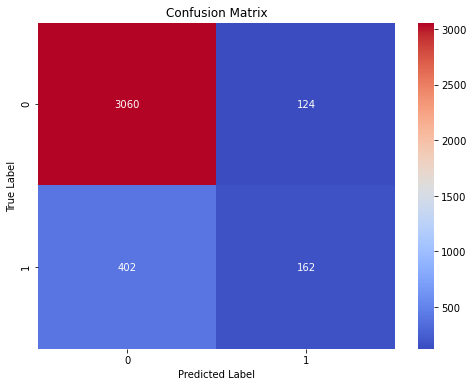

In [283]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.mllib.evaluation import MulticlassMetrics

# Assuming you have already prepared your data and have X_train_transformed, X_test_transformed DataFrames

# Get the size of features
num_features = len(X_train_transformed.select("features").first()["features"])

# Define Multilayer Perceptron classifier
layers = [num_features, 10, 5, 2]  # Define the layers of the neural network
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="Revenue_int", layers=layers, seed=1234)

# Train the model
model = mlp.fit(X_train_transformed)

# Make predictions on the test set
predictions = model.transform(X_test_transformed)

# Define MulticlassClassificationEvaluator for accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="accuracy")

print("Multilayer Perceptron Model")

# Calculate accuracy
accuracy = evaluator_accuracy.evaluate(predictions)
print("Accuracy:", accuracy)

# Define MulticlassClassificationEvaluator for F1 score
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="f1")

# Calculate F1 score
f1_score = evaluator_f1.evaluate(predictions)
print("F1 Score:", f1_score)


# Define MulticlassClassificationEvaluator for precision
evaluator_precision = MulticlassClassificationEvaluator(labelCol="Revenue_int", predictionCol="prediction", metricName="weightedPrecision")

# Calculate precision
precision = evaluator_precision.evaluate(predictions)
print("Precision:", precision)

# Cast Revenue_int to DoubleType
predictions = predictions.withColumn("Revenue_int", col("Revenue_int").cast("double"))

# Calculate confusion matrix
predictionAndLabels = predictions.select("prediction", "Revenue_int").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Convert the confusion matrix to a numpy array
conf_matrix = metrics.confusionMatrix().toArray()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="g")

# Set labels, title, and display the heatmap
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## 5. Selecting the Best Model:

In [284]:
f1_scores = {
    "Random Forest": 0.7762014861541752,
    "Decision Tree": 0.7804213888591897,
    "Naive Bayes": 0.8705436685550024,
    "Support Vector Machine": 0.8725874635412649,
    "Logistic Regression": 0.873354694245517,
    "Neural Network": 0.839643738832266
}

# Find the best model
best_model = max(f1_scores, key=f1_scores.get)
best_f1_score = f1_scores[best_model]

# Print the best model and its F1 score
print("Best Model:", best_model)
print("Best F1 Score:", best_f1_score)


Best Model: Logistic Regression
Best F1 Score: 0.873354694245517


Among the six models evaluated, logistic regression stands out as the most effective in accurately determining whether an online visitor will make a purchase or not, given its highest F1 score of 0.87335. This indicates that logistic regression strikes a good balance between precision and recall, making it a reliable choice for classification tasks in this context. Additionally, logistic regression is computationally efficient and interpretable, making it suitable for real-world deployment and providing insights into the factors influencing purchase behavior in online visitors.

## Component 3: Conclusion

In this project, we aimed to construct a predictive model to determine whether an online visitor will make a purchase. We began by conducting exploratory data analysis and preprocessing tasks, such as data cleaning, feature engineering, and categorical variable encoding. Subsequently, we trained and evaluated six classification models: Random Forest, Decision Tree, Naive Bayes, Linear SVM, Logistic Regression, and Multilayer Perceptron. Among these models, Logistic Regression emerged as the top performer, achieving the highest F1 score of 0.87335, indicating its effectiveness in predicting online purchase behavior.

<H5>Future Scopes: Enhancing Model Performance and Deployment Opportunities</H5>

* Moving forward, to enhance the model's performance, we could explore techniques such as data balancing to address any class imbalance issues and hyperparameter tuning to optimize the model's parameters further. 



* Experimenting with ensemble methods like stacking or boosting, which combine the predictions of multiple models, could potentially further enhance predictive performance by leveraging the strengths of different algorithms.



* Additionally, deploying the best-performing model in a real-world scenario and monitoring its performance over time would provide valuable insights into its practical effectiveness and potential areas for improvement.

## References :

* Big Data Analytics - Lecture and Lab (Topic 6-9) - Dr V L Raju Chinthalapati


* http://lnkiy.in/pyspark_tutorial


* http://lnkiy.in/Beginners-guide-to-pyspark


* http://lnkiy.in/pyspark-example-tutorials